In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import time
import psutil  # For memory measurement

model_directory = 'D:\MLT QNN\Phi-2-quant'
# Ensure the model is in full precision (FP32)
model = AutoModelForCausalLM.from_pretrained(model_directory)
tokenizer = AutoTokenizer.from_pretrained(model_directory)

prompt_text = "Explain logistic regression in regression analysis."
input_ids = tokenizer.encode(prompt_text, return_tensors='pt')

# Increase max_length for more detailed output
max_length = 200  # Example value, adjust based on your needs

# Measure start time
start_time = time.time()
# Measure initial memory usage using psutil
start_mem = psutil.Process().memory_info().rss

from torch.cuda.amp import autocast

# Wrap your inference code with autocast
with autocast():
    output_sequences = model.generate(input_ids, max_length=max_length, no_repeat_ngram_size=2)


# Measure final memory usage
end_mem = psutil.Process().memory_info().rss
# Measure end time
end_time = time.time()

generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)

# Memory usage calculation (convert bytes to megabytes)
memory_usage = (end_mem - start_mem) / (1024**2)

print(f"Generated Text: {generated_text}\n")
print(f"Latency: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")


Using `disable_exllama` is deprecated and will be removed in version 4.37. Use `use_exllama` instead and specify the version with `exllama_config`.The value of `use_exllama` will be overwritten by `disable_exllama` passed in `GPTQConfig` or stored in your config file.
Some weights of the model checkpoint at D:\MLT QNN\Phi-2-quant were not used when initializing PhiForCausalLM: ['model.layers.12.self_attn.k_proj.bias', 'model.layers.22.self_attn.k_proj.bias', 'model.layers.22.self_attn.v_proj.qweight', 'model.layers.7.self_attn.k_proj.g_idx', 'model.layers.1.self_attn.v_proj.bias', 'model.layers.6.self_attn.v_proj.bias', 'model.layers.19.self_attn.k_proj.bias', 'model.layers.31.self_attn.k_proj.qzeros', 'model.layers.29.self_attn.q_proj.scales', 'model.layers.21.self_attn.k_proj.g_idx', 'model.layers.0.self_attn.k_proj.bias', 'model.layers.6.self_attn.v_proj.scales', 'model.layers.14.self_attn.q_proj.qzeros', 'model.layers.3.self_attn.k_proj.scales', 'model.layers.6.self_attn.k_proj.qwe

RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'

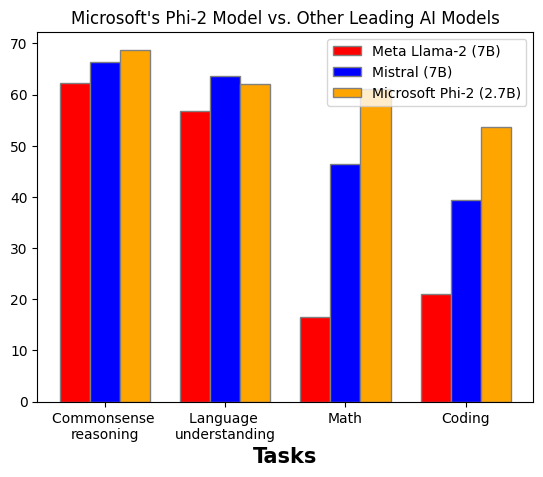

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the image provided
categories = ['Commonsense \nreasoning', 'Language \nunderstanding', 'Math', 'Coding']
mistral = [66.4, 63.7, 46.4, 39.4]
meta_llama = [62.2, 56.7, 16.5, 21]
microsoft_phi = [68.8, 62, 61.1, 53.7]

# Bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(meta_llama))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
plt.bar(r1, meta_llama, color='r', width=bar_width, edgecolor='grey', label='Meta Llama-2 (7B)')
plt.bar(r2, mistral, color='b', width=bar_width, edgecolor='grey', label='Mistral (7B)')
plt.bar(r3, microsoft_phi, color='orange', width=bar_width, edgecolor='grey', label='Microsoft Phi-2 (2.7B)')

# Add labels to the middle of the grouped bars
plt.xlabel('Tasks', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(meta_llama))], categories)

# Add title
plt.title("Microsoft's Phi-2 Model vs. Other Leading AI Models")

# Create legend & Show graphic
plt.legend()
plt.show()
